# Análise de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Exercício

Faça uma análise de um dataset de sua escolha e que contenha, **ao menos**: agrupamento por classe e período. Distribuição de variáveis contínuas e categóricas; Verificação de caso mais frequente, maior volume e etc. Verificação de casos ou classes únicas.

Após essa análise inicial, você deve criar uma hipótese a ser verificada nos dados.

**Exemplo**: Há diferença entre os tipos de produtos mais vendidos em diferentes lojas de uma mesma rede de supermercados. 

Então, deve verificar e concluir se a hipótese era verdadeira ou falsa. 

Faça um gráfico ou tabela que seja apresentável! Você mostrará a sua análise para o restante da turma. 

Há dois conjuntos de dados sugeridos, mas você é livre para escolher um novo, contanto que não leve mais que 5 minutos!

**Questão a Responder**: Distribuição de soma de credito concebido por tipo de crédito.

### Dados de super mercado

[Leia a descrição dos dados aqui](https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data). 

### Crédito

[Leia a descrição dos dados aqui](https://www.kaggle.com/c/home-credit-default-risk/data). 

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" />

**Os arquivos necessários para as duas bases acima já estão na pasta da aula**. 

Outras sugestões:

- [UFC-Fight historical data from 1993 to 2019](https://www.kaggle.com/rajeevw/ufcdata), Compiled UFC fight, fighter stats and information 
- [Africa Economic, Banking and Systemic Crisis Data](https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data), Data on Economic and Financial crises in 13 African Countries (1860 to 2014)

In [3]:
dados = pd.read_csv("favorita/train.csv", parse_dates=['date'], nrows=1000000)
items = pd.read_csv("favorita/items.csv")
lojas = pd.read_csv("favorita/stores.csv")

In [4]:
dados.shape

(1000000, 6)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
id             1000000 non-null int64
date           1000000 non-null datetime64[ns]
store_nbr      1000000 non-null int64
item_nbr       1000000 non-null int64
unit_sales     1000000 non-null float64
onpromotion    0 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 45.8 MB


In [ ]:
dados = pd.read_csv("credit/application_train.csv.zip")
bureau_balance = pd.read_csv("credit/bureau_balance.csv.zip")
bureau = pd.read_csv("credit/bureau.csv.zip")
credit_card_balance = pd.read_csv("credit/credit_card_balance.csv.zip")
installments = pd.read_csv("credit/installments_payments.csv.zip")
previous_application = pd.read_csv("credit/previous_application.csv.zip")
pos_cash_balance = pd.read_csv("credit/POS_CASH_balance.csv.zip")
columns_info = pd.read_csv("credit/HomeCredit_columns_description.csv", engine="python", index_col=0)

In [7]:
dados.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [184]:
items.head()


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [186]:
lojas.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# Verificando o tamanho da tabela lojas

In [191]:
lojas.shape

(54, 5)

# Verificando de se existem valores nulos

In [192]:
lojas.isnull().values.any()

False

# Analisando os tipos de dados

In [207]:
lojas.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


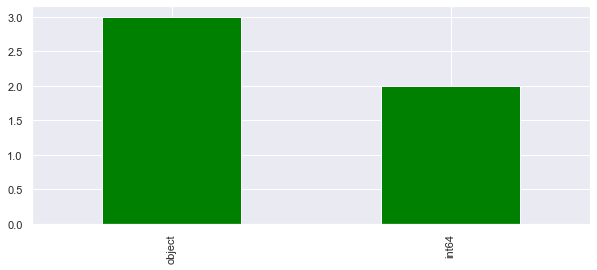

[dtype('int64') dtype('O')]
2


In [193]:
pp = pd.value_counts(lojas.dtypes)
fig = plt.figure(figsize=(10,4))
pp.plot.bar(color='green')
plt.show()

print(lojas.dtypes.unique())
print(lojas.dtypes.nunique())

# Analise Exploratoria

In [197]:
#numero de lojas unicas
lojas.store_nbr.nunique()

54

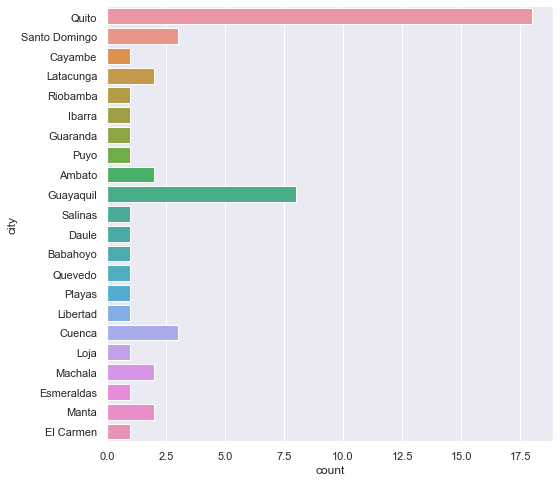

In [199]:
#Distribuição de lojas por cidade
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.countplot(y=lojas['city'], data=lojas) 

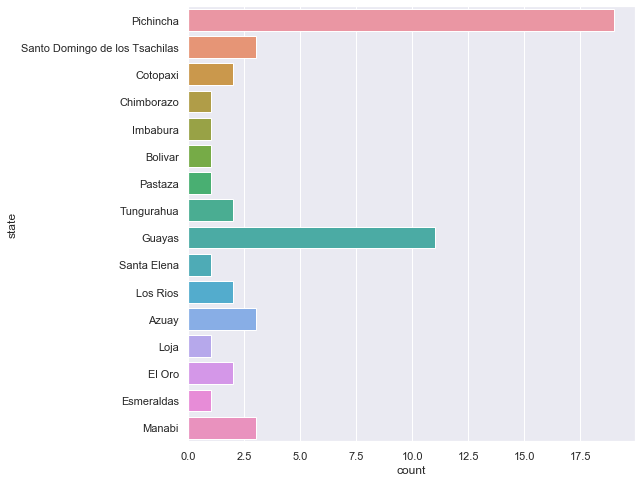

In [200]:
#--- Distribuição de lojas por estado
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax = sns.countplot(y=lojas['state'], data=lojas) 

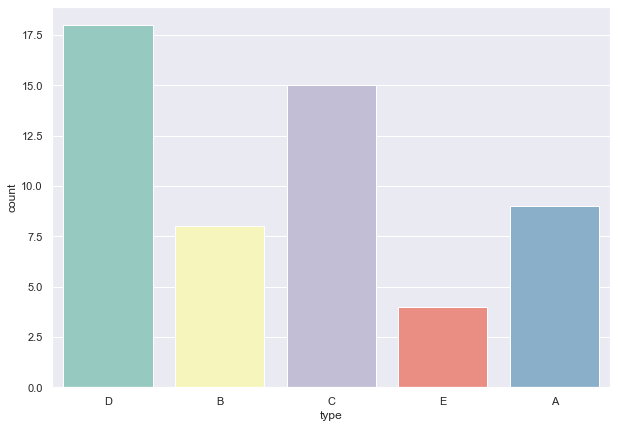

In [201]:
#Tipos de Lojas
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax = sns.countplot(x="type", data=lojas, palette="Set3")

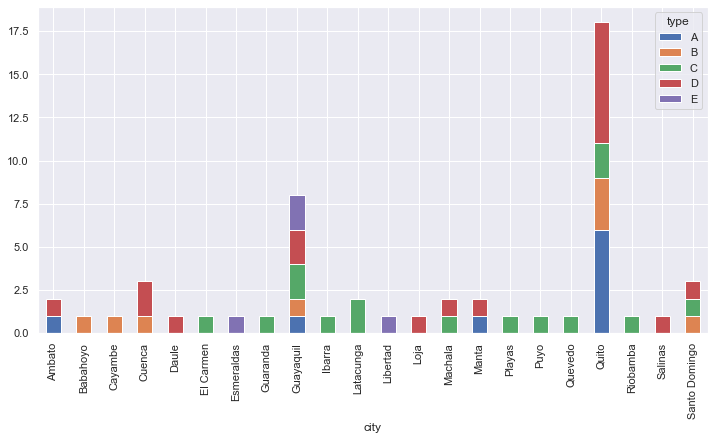

In [202]:


#Tipos de lojas Versus Cidades

ct = pd.crosstab(lojas.city, lojas.type)

ct.plot.bar(figsize = (12, 6), stacked=True)
plt.legend(title='type')

plt.show()



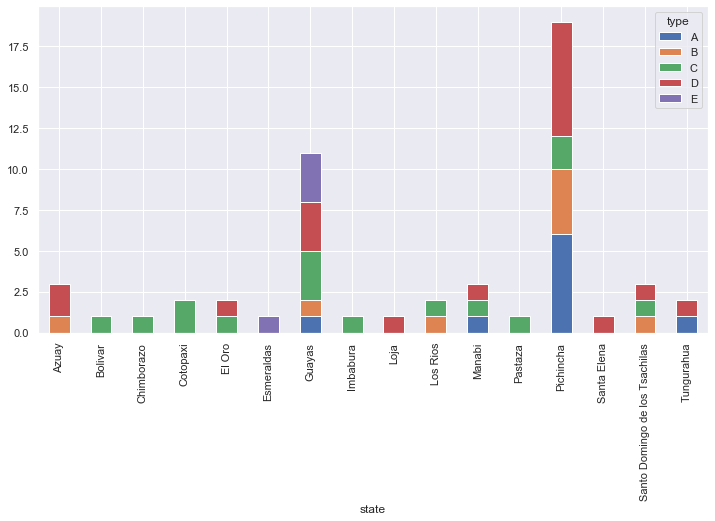

In [203]:


#Tipos de lojas Versus Estados

ct = pd.crosstab(lojas.state, lojas.type)

ct.plot.bar(figsize = (12, 6), stacked=True)
plt.legend(title='type')

plt.show()



# Criando campos de data

In [208]:


import calendar

dados["year"] = dados["date"].astype(str).str[:4].astype(np.int64)
dados["month"] = dados["date"].astype(str).str[5:7].astype(np.int64)
dados['date'] = pd.to_datetime(dados['date'], errors ='coerce')
dados['day_of_week'] = dados['date'].dt.weekday_name


dados["year"] = dados["year"].astype(str)
dados.head()



,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day_of_week
0,0,2013-01-01,25,103665,7.0,NaN,2013,1,Tuesday
1,1,2013-01-01,25,105574,1.0,NaN,2013,1,Tuesday
2,2,2013-01-01,25,105575,2.0,NaN,2013,1,Tuesday
3,3,2013-01-01,25,108079,1.0,NaN,2013,1,Tuesday
4,4,2013-01-01,25,108701,1.0,NaN,2013,1,Tuesday


# Dias da semana com mais produtos vendidos

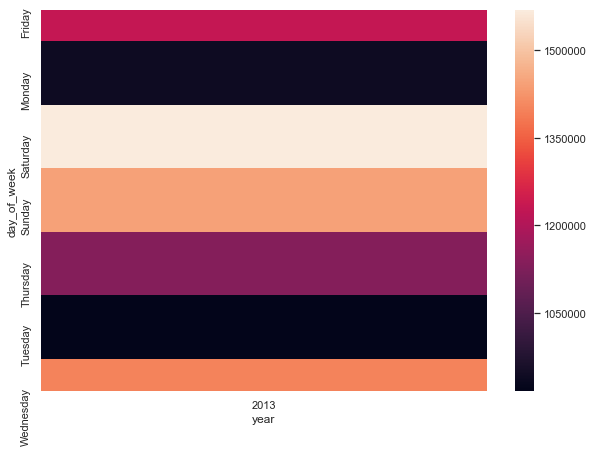

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

x = dados.groupby(['day_of_week', 'year'], as_index=False).agg({'unit_sales':'sum'})
y = x.pivot("day_of_week", "year", "unit_sales")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y);